# II Travail préparatoire

1 Expliciter la fonctionnelle $\vec{F}$.

En notant $u_0 = z$ et $u_1 = V$ les deux composantes du vecteur $\vec{u}$ il vient
$\dfrac{{\rm d} u_0}{{\rm d}t} = -V = -u_1$ d'une part et $\dfrac{{\rm d} u_1}{{\rm d}t} = \dfrac{{\rm d} V}{{\rm d}t} = g - \dfrac{1}{2m}\times\rho\left(u_0\right)\times S\times c_x \times u_1^2$ d'autre part.

2 Relations de récurrences


$t_{k+1} = t_k + pas$

$z_{k+1} = z_k - V_k \times pas$ Attention au signe moins ici à cause de la définition de $V$

$V_{k+1} = V_k + \left(g - \dfrac{1}{2m}\times\rho\left(z_k\right)\times S\times c_x \times V_k^2 \right) \times pas$

3 Écrire une fonction maxi

In [1]:
def maxi(L):
    imax = 0 # Indice du maximum courant
    max_c = L[0] # Maximum courant. On suppose la liste non vide !
    for i in range(1,len(L)): # On peut commencer à l'indice 1
        if L[i] > max_c:
            max_c = L[i]
            imax = i
    return [max_c, imax] # On rend ici une liste à deux éléments

In [2]:
maxi ([1, 3, -2, 9, 4, 6]) # On teste sur un exemple qui doit rendre [9, 3]

[9, 3]

4 Fonction rho

In [11]:
# Import de la fonction exponentielle
from math import exp

# Je choisis de définir toutes les constantes de manière globale. Elles pourront être utilisées dans les fonctions python
m = 130 # En kg
S = 1 # En m^2
cx = 0.8 # Sans unité
g = 9.81 # En m/s^2

zp = 2500 # En m. Altitude ouverture du parachute
c = 300 # En m/s Vitesse du son à -50°C

rho_0 = 1.2 # En kg/m^3
H = 7000 # En m
def rho(z):
    return rho_0 * exp ( - z / H)


# III Mise en oeuvre de la méthode d'Euler

In [4]:
def euler (pas, z0):
    tc = 0
    zc = z0
    vc = 0
    
    liste_t = [tc]
    liste_z = [zc]
    liste_v = [vc]
    
    while (zc > zp):
        tc = tc + pas
        vc2 = vc + pas * (g - 0.5 * S * cx * rho(zc) * vc ** 2 / m) # vc2 est une autre variable intermédiaire pour ne pas écraser la valeur courante de la vitesse dont on a besoin pour le calcul du nouveau zc, afin de respecter les relations de récurrence données plus haut. D'autres choix sont possibles
        zc = zc - vc * pas
        vc = vc2
        
        liste_t.append(tc)
        liste_z.append(zc)
        liste_v.append(vc)
    
    return [liste_t, liste_z, liste_v]

In [9]:
resultat = euler(1, 39068)

# IV Tracé des courbes

In [21]:
# Import de pyplot
import matplotlib.pyplot as plt

def courbes (pas, z0):
    resultat = euler(1, z0)
    
    plt.figure()
    plt.title("Altitude en fonction du temps")
    plt.plot(resultat[0], resultat[1])
    plt.show()
    
    plt.figure("")
    plt.title("Vitesse en fonction de l'altitude")
    plt.plot(resultat[1], resultat[2])
    vitesse_son = [c,c]
    altitudes_extremes = [resultat[1][0], resultat[1][-1]]
    plt.plot(altitudes_extremes, vitesse_son, "--")
    plt.show()

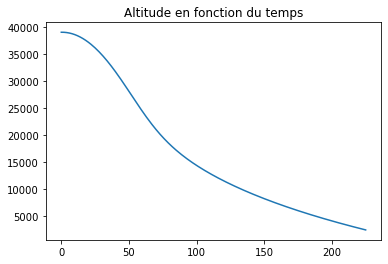

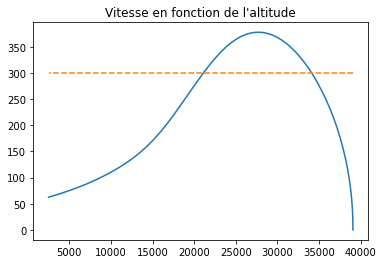

In [22]:
courbes (1, 39068)

# V Exploitation des résultats